In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
market_dataset=pd.read_csv('Downloads/Mall_Customers.csv')

In [16]:
market_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
market_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# define variable
X=market_dataset.iloc[:, [3,4]].values

In [60]:
# find optimal cluster numbers

wcss = []

for _ in range(1,11):
  no_of_means = KMeans(n_clusters=_, init='k-means++', random_state=21)
  no_of_means.fit(X)

  wcss.append(no_of_means.inertia_)

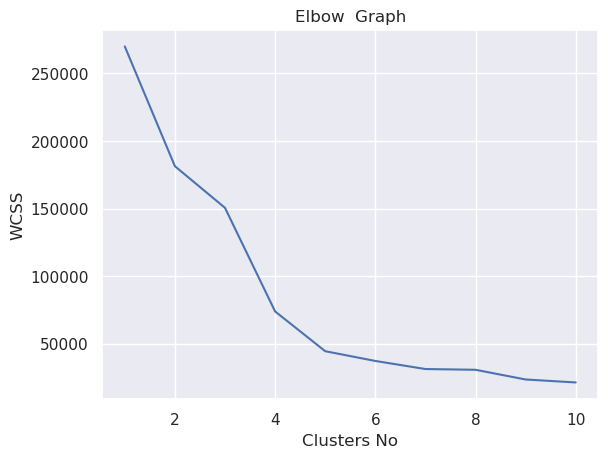

In [61]:
#  elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow  Graph')
plt.xlabel('Clusters No')
plt.ylabel('WCSS')
plt.show()

In [64]:
no_of_means = KMeans(n_clusters=8, init='k-means++', random_state=21)

# return a label for each data point based on their cluster
Y = no_of_means.fit_predict(X)

print(Y)

[3 0 3 0 3 0 3 7 3 0 3 7 3 0 3 0 3 0 3 7 3 0 3 0 3 7 3 0 3 7 3 0 3 7 3 7 3
 0 3 0 3 7 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 1 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 1 2
 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 6 2 6 2 6
 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2]


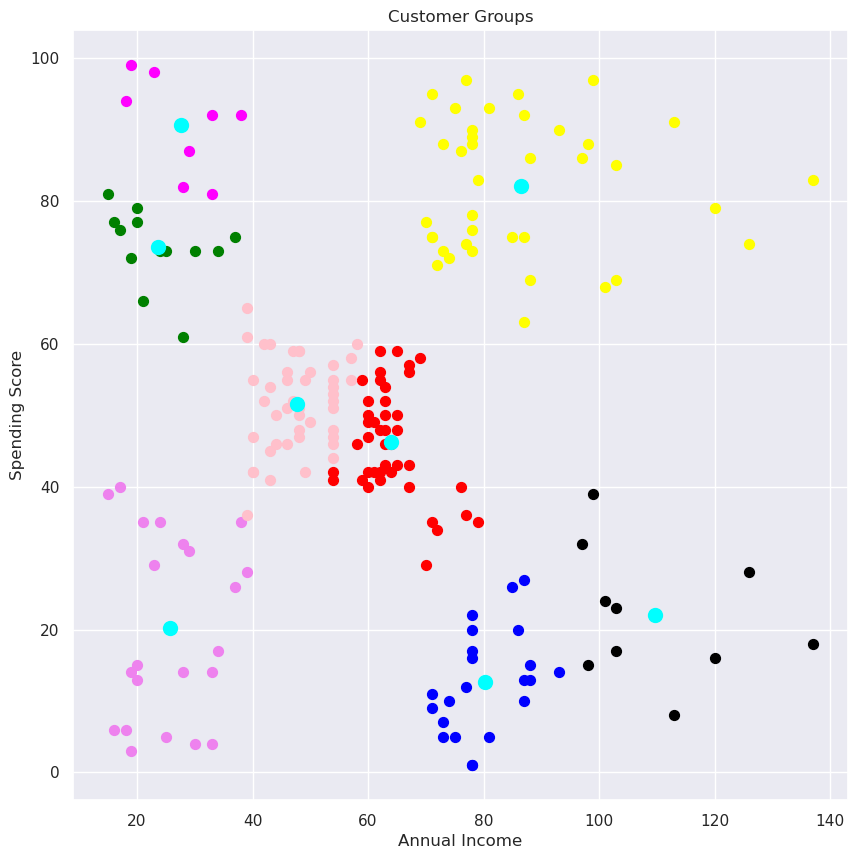

In [65]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='pink', label='Cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1], s=50, c='black', label='Cluster 7')
plt.scatter(X[Y==7,0], X[Y==7,1], s=50, c='magenta', label='Cluster 8')
# plot the centroids
plt.scatter(no_of_means.cluster_centers_[:,0], no_of_means.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
